In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('data_stocks.csv')

In [121]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [122]:
data.shape

(41266, 502)

In [123]:
data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [124]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [125]:
data['DATE'] = pd.to_datetime(data['DATE'], unit = 's')

In [126]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [127]:
data_copy = data.copy()

In [128]:
list1 = {}
list2 = {}

data2 = pd.DataFrame()

In [129]:
for column in data_copy.columns[1:]:
    try:
        col = column.split('.')[1]
    except:
        col = column
        
    Open = data_copy.groupby([data_copy['DATE'].dt.date])[column].first()
    Low = data_copy.groupby([data_copy['DATE'].dt.date])[column].min()
    High = data_copy.groupby([data_copy['DATE'].dt.date])[column].max()
    Close = data_copy.groupby([data_copy['DATE'].dt.date])[column].last()
    
    df = pd.DataFrame([Open, Low, High, Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open', 'Low', 'High', 'Close']
    df1.columns = [col]
    
    list1[col] = df
    list2[col] = df1

In [130]:
final_data = list2['SP500'].reset_index()
for item in list2.keys():
    final_data = pd.merge(final_data,list2[item].reset_index())
final_data.index = final_data['DATE']
final_data = final_data.drop('DATE', axis=1)

# Generating the final data for all the stocks with closing rates.

In [131]:
final_data.head()

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,2358.9600,42.48,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,2359.9600,40.90,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,2352.8401,41.31,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,2357.6699,41.72,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,2355.6899,41.81,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


## Problem 1
#### There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [132]:
from math import sqrt
#Calculate average annual percentage return and volatilities for a year period
returns = final_data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
print(returns)

              0
SP500  0.114601
AAL    0.166486
AAPL   0.334870
ADBE   0.444513
ADI    0.101846
ADP    0.151572
ADSK   0.754191
AKAM  -0.419111
ALXN   0.486350
AMAT   0.396032
AMD   -0.059861
AMGN   0.208282
AMZN   0.244868
ATVI   0.703947
AVGO   0.376074
BBBY  -0.654829
BIIB   0.387661
CA     0.162043
CBOE   0.545143
CELG   0.292109
CERN   0.351880
CHRW  -0.173745
CHTR   0.475586
CINF   0.180555
CMCSA  0.199632
CME    0.174471
COST  -0.125155
CSCO  -0.081857
CSX    0.205319
CTAS   0.209756
...         ...
USB   -0.004373
UTX    0.167773
V      0.359639
VAR    0.367547
VFC    0.356812
VLO    0.082462
VMC    0.067534
VNO   -0.660979
VTR    0.127850
VZ    -0.043738
WAT    0.394332
WEC    0.180851
WFC   -0.185606
WHR    0.036613
WM     0.148467
WMB    0.010938
WMT    0.211120
WRK    0.272308
WU    -0.093137
WY    -0.064454
WYN    0.435290
XEC   -0.368842
XEL    0.264958
XL     0.109202
XOM   -0.168477
XRX    7.389203
XYL    0.559851
YUM    0.461990
ZBH   -0.126778
ZTS    0.407820

[501 ro

In [133]:
returns.columns = ['Returns']
returns['Volatility'] = final_data.pct_change().std() * sqrt(252)

In [134]:
print(returns['Volatility'])

SP500    0.074230
AAL      0.291341
AAPL     0.189672
ADBE     0.158591
ADI      0.245518
ADP      0.252242
ADSK     0.324334
AKAM     0.390356
ALXN     0.349645
AMAT     0.280294
AMD      0.654776
AMGN     0.158266
AMZN     0.180476
ATVI     0.249676
AVGO     0.272981
BBBY     0.305722
BIIB     0.243609
CA       0.296177
CBOE     0.125602
CELG     0.206491
CERN     0.196080
CHRW     0.219613
CHTR     0.236928
CINF     0.144798
CMCSA    0.168533
CME      0.144601
COST     0.211866
CSCO     0.183155
CSX      0.235222
CTAS     0.203702
           ...   
USB      0.135995
UTX      0.119504
V        0.116137
VAR      0.143321
VFC      0.196995
VLO      0.178010
VMC      0.243673
VNO      0.347930
VTR      0.143621
VZ       0.183143
WAT      0.183005
WEC      0.095105
WFC      0.167939
WHR      0.218109
WM       0.093954
WMB      0.195635
WMT      0.151576
WRK      0.204838
WU       0.156927
WY       0.174480
WYN      0.225041
XEC      0.281019
XEL      0.087660
XL       0.181381
XOM      0

In [135]:
data = np.asarray([np.asarray(returns['Returns']), np.asarray(returns['Volatility'])]).T

In [136]:
cleaned_data = np.where(np.isnan(data), 0, data)
#cleaned_data = pd.DataFrame(returns)

In [137]:
#cleaned_data.isnull().sum()
# No missing values

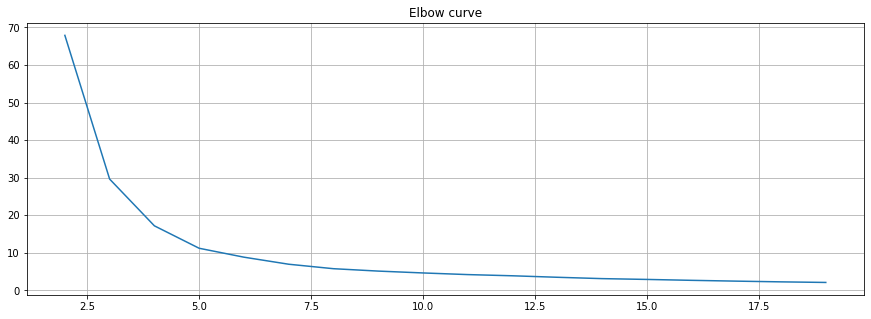

In [138]:
X = cleaned_data
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize = (15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [143]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
kmeans.cluster_centers_

In [140]:
y_kmeans

array([0, 0, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 0, 3, 3, 4, 3, 0, 3, 0, 3, 2,
       3, 0, 0, 0, 2, 2, 0, 0, 3, 2, 4, 4, 2, 0, 3, 0, 3, 2, 3, 0, 3, 2,
       3, 2, 0, 0, 0, 2, 2, 3, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0, 2, 3,
       3, 0, 2, 0, 3, 3, 0, 4, 3, 2, 3, 3, 3, 2, 2, 0, 3, 2, 0, 3, 0, 0,
       4, 0, 2, 0, 0, 2, 3, 2, 0, 3, 2, 2, 0, 0, 3, 2, 4, 0, 0, 0, 3, 2,
       0, 4, 4, 0, 3, 3, 0, 0, 3, 3, 3, 3, 2, 0, 3, 4, 3, 2, 3, 0, 2, 2,
       0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 3, 3, 4,
       4, 0, 3, 0, 0, 0, 3, 0, 0, 2, 4, 3, 0, 3, 0, 3, 3, 0, 0, 3, 4, 0,
       0, 4, 0, 0, 0, 3, 2, 3, 2, 2, 3, 0, 0, 2, 3, 3, 0, 2, 0, 4, 3, 0,
       0, 0, 4, 0, 0, 3, 0, 2, 0, 0, 3, 3, 2, 2, 2, 3, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 0, 0, 2, 4, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 3, 0, 0, 2, 0, 3, 0, 0, 3,
       4, 4, 2, 3, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 4, 4, 3, 2, 0,
       2, 0, 2, 0, 4, 0, 4, 0, 0, 3, 2, 0, 0, 2, 3,

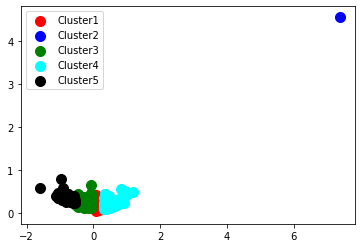

In [145]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='black',label='Cluster5')
plt.legend()
plt.show()

In [146]:
# As observed from the scatter plot, we have an outlier. Lets delete the outlier.

In [152]:
print(returns.max())
print(returns.idxmax())

Returns       7.389203
Volatility    4.574941
dtype: float64
Returns       XRX
Volatility    XRX
dtype: object


In [153]:
returns.drop('XRX', inplace = True)

fin_data = np.asarray([np.asarray(returns['Returns']), np.asarray(returns['Volatility'])]).T

In [154]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(fin_data)

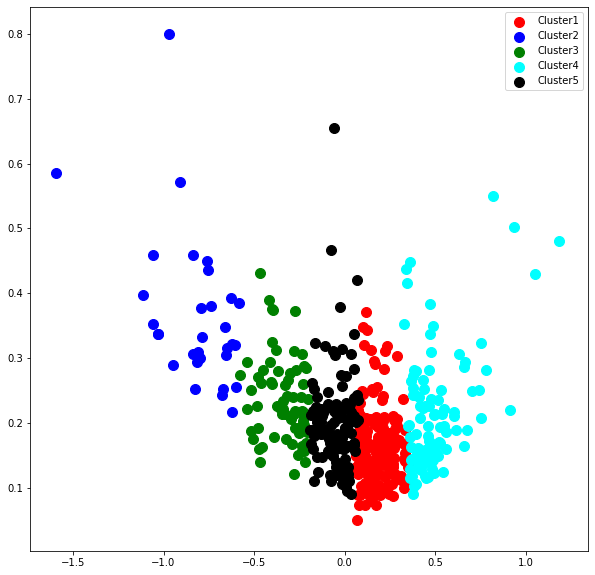

In [158]:
plt.figure(figsize = (10,10))
plt.scatter(fin_data[y_kmeans==0,0],fin_data[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(fin_data[y_kmeans==1,0],fin_data[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(fin_data[y_kmeans==2,0],fin_data[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(fin_data[y_kmeans==3,0],fin_data[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(fin_data[y_kmeans==4,0],fin_data[y_kmeans==4,1],s=100,c='black',label='Cluster5')
plt.legend()
plt.show()

In [163]:
details = [(name,cluster) for name, cluster in zip(returns.index,y_kmeans)]

In [166]:
datadf = pd.DataFrame.from_records(details,columns=['Stock','Cluster'])
datadf.head(n=10)

,Stock,Cluster
0,SP500,0
1,AAL,0
2,AAPL,0
3,ADBE,3
4,ADI,0
5,ADP,0
6,ADSK,3
7,AKAM,2
8,ALXN,3
9,AMAT,3


In [167]:
# We now have the list of all the stocks along with the clusters to which they belong

## Problem 2
#### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [228]:
final_data.head()

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,2358.9600,42.48,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,2359.9600,40.90,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,2352.8401,41.31,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,2357.6699,41.72,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,2355.6899,41.81,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [229]:
final_data_diff = final_data.diff(periods=1, axis=0)

In [230]:
final_data_diff = final_data_diff.fillna(0)
final_data_diff.head()

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,0.0000,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
2017-04-04,1.0000,-1.58,1.070,0.42,0.02,0.18,-0.44,1.20,-0.98,0.11,...,0.17,1.81,0.11,0.32,0.26,-0.03,0.93,0.29,-0.57,-0.535
2017-04-05,-7.1199,0.41,-0.750,-0.15,-1.20,0.48,-1.41,-0.50,-2.09,-0.62,...,0.16,-2.27,0.31,-0.34,0.19,-0.07,0.05,0.03,-0.61,0.030
2017-04-06,4.8298,0.41,-0.335,0.26,0.28,-0.18,0.53,-0.07,-0.72,0.21,...,0.83,0.49,-0.21,0.43,0.49,-0.02,0.52,0.69,0.05,0.010
2017-04-07,-1.9800,0.09,-0.345,0.07,-0.31,0.44,0.72,-0.63,0.13,0.34,...,-0.48,0.08,-0.20,0.02,-0.24,0.00,-0.09,-0.28,-0.34,-0.130


In [231]:
from sklearn.preprocessing import MinMaxScaler
final_data_diff_fluc = MinMaxScaler().fit(final_data_diff).transform(final_data_diff)
data_diff_scale = pd.DataFrame(final_data_diff_fluc,columns=final_data.columns,index=final_data.index)
data_diff_scale_T = data_diff_scale.T
data_diff_scale_T.head()

DATE,2017-04-03,2017-04-04,2017-04-05,2017-04-06,2017-04-07,2017-04-10,2017-04-11,2017-04-12,2017-04-13,2017-04-17,...,2017-08-18,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-30,2017-08-31
SP500,0.633436,0.648075,0.529207,0.704140,0.604450,0.654516,0.585859,0.498024,0.406675,0.924171,...,0.561413,0.670619,0.990190,0.510322,0.558775,0.698873,0.642367,0.667396,0.793445,0.841017
AAL,0.509474,0.176842,0.595789,0.595789,0.528421,0.616842,0.848421,0.515789,0.381053,0.694737,...,0.408421,0.543158,0.446316,0.206316,0.288421,1.000000,0.446316,0.427368,0.458947,0.597895
AAPL,0.458779,0.540458,0.401527,0.433206,0.432443,0.443511,0.343511,0.471756,0.401527,0.516031,...,0.430534,0.436641,0.654962,0.474046,0.408397,0.500000,0.581679,0.573282,0.487786,0.506870
ADBE,0.579014,0.632111,0.560051,0.611884,0.587863,0.571429,0.552465,0.506953,0.537295,0.697851,...,0.546144,0.742099,0.957016,0.433628,0.542351,0.659924,0.621997,0.623262,0.772440,0.767383
ADI,0.484549,0.487021,0.336218,0.519159,0.446230,0.400494,0.330037,0.334981,0.440049,0.469716,...,0.506799,0.479604,0.666255,0.472188,0.509271,0.447466,0.542645,0.498146,1.000000,0.480841


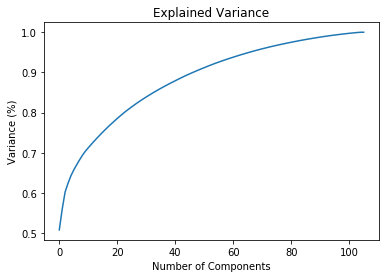

In [232]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(data_diff_scale_T)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [192]:
# We can observe that considering 3 components/features around 60% variance in data can be explained.

In [233]:
pca=decomposition.PCA(n_components=3)
pca.fit(data_diff_scale_T)
data_pca = pca.transform(data_diff_scale_T)

In [248]:
#datax = np.asarray([np.asarray(data_pca)])
principal_df1 = pd.DataFrame(data = data_pca
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [249]:
principal_df1

,principal component 1,principal component 2,principal component 3
0,-1.145059,-0.209911,0.635551
1,0.236764,-0.094957,0.502146
2,0.672887,0.034948,0.608782
3,-0.715497,0.508563,1.206889
4,0.521315,0.053220,0.634208
5,1.364269,0.150057,-0.178847
6,2.622442,0.025866,0.220362
7,-3.375311,0.032487,0.036922
8,0.095850,0.121412,0.270520
9,-1.297901,0.091338,1.155944


In [234]:
pca.explained_variance_

array([2.1181811 , 0.21477654, 0.17804375])

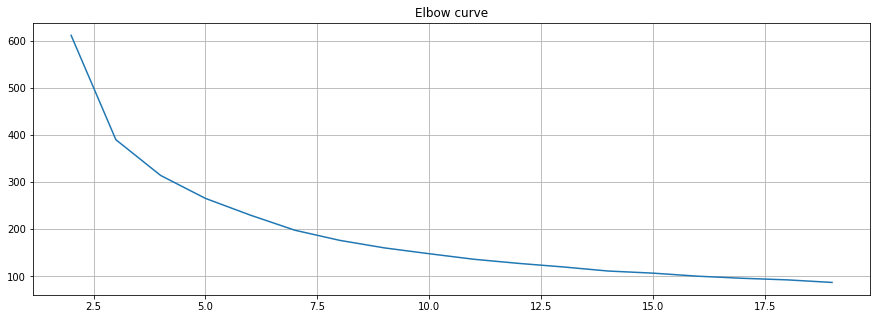

In [253]:
X = principal_df1
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k, init= 'k-means++')
    k_means.fit(X)
    wcss.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [198]:
# Lets choose k = 7

In [266]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 0 3 0 4 2 1 0 3 1 0 3 0 4 3 0 0 4 0 2 3 4 2 3 3 3 1 0 2 4 0 3 1 3 4 4
 3 3 1 0 1 3 1 0 1 1 3 0 0 0 2 0 0 4 5 3 3 1 3 3 2 0 3 3 2 0 4 3 3 5 0 4 1
 0 0 0 0 3 3 5 0 2 0 1 4 5 0 1 0 5 4 1 0 4 3 0 0 4 1 2 3 2 4 1 3 3 5 0 5 3
 3 1 1 0 2 1 3 2 2 0 0 1 3 4 1 0 1 4 1 1 0 6 6 6 0 2 3 0 4 4 4 3 0 4 4 4 3
 0 0 3 0 3 5 3 2 0 6 3 0 3 6 2 3 1 2 3 0 5 4 2 3 3 0 1 3 3 1 3 4 0 5 1 5 0
 1 4 3 0 0 3 0 4 3 4 5 0 2 6 3 1 5 6 0 6 2 5 3 0 2 5 0 3 3 4 5 5 5 1 6 0 0
 0 3 0 2 4 1 5 2 6 5 5 1 0 6 6 1 5 2 3 6 0 6 2 0 4 5 0 5 6 0 3 1 0 2 6 6 5
 0 2 3 4 3 1 1 1 2 5 3 0 3 5 5 3 3 3 1 4 5 3 1 5 3 3 6 1 3 5 4 3 4 5 1 0 0
 1 0 3 6 4 1 0 3 1 1 0 0 3 0 3 1 5 0 0 5 5 4 5 5 6 5 4 6 2 1 5 0 5 3 3 4 3
 4 3 0 3 6 3 5 3 5 5 1 3 3 5 4 2 4 4 3 1 4 3 0 3 1 0 1 4 5 5 4 5 5 0 5 5 5
 6 4 5 6 2 0 0 5 2 0 3 2 3 5 1 2 5 6 6 6 4 3 3 0 5 3 4 0 3 3 5 6 1 6 2 3 1
 5 4 4 0 1 6 4 3 5 1 4 5 3 2 3 0 5 3 4 6 3 1 4 4 1 5 5 4 6 5 0 6 3 0 2 4 1
 3 3 2 3 3 3 5 3 3 5 4 3 0 5 2 4 0 5 0 0 0 1 0 5 3 3 3 5 0 0 0 3 4 4 1 6 2
 0 6 5 3 3 5 3 0 3 3 4 4 

In [267]:
kmeans.cluster_centers_

array([[ 0.33235437,  0.04352503,  0.28107996],
       [-2.27792914,  0.05621777, -0.06680913],
       [ 2.92583996,  0.01617353, -0.0263407 ],
       [-1.00493843, -0.04990961,  0.15521807],
       [ 1.5359005 , -0.06000072,  0.06237242],
       [ 0.03739244, -0.51404436, -0.41316448],
       [ 0.09635825,  1.07342173, -0.45040771]])

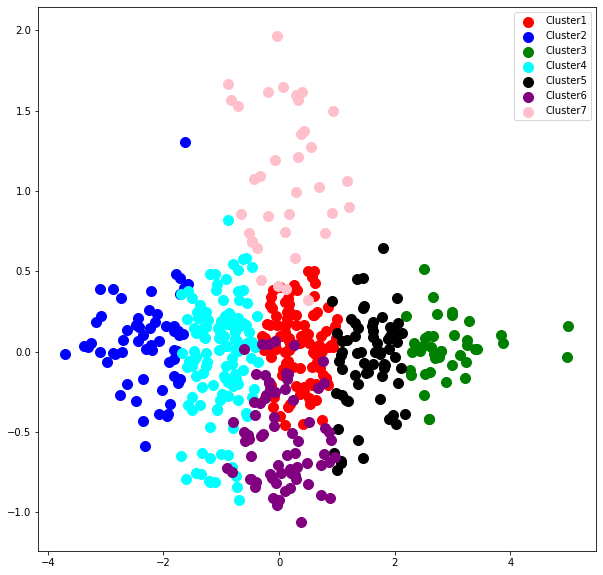

In [268]:
plt.figure(figsize = (10,10))
plt.scatter(X[y_kmeans==0]['principal component 1'],X[y_kmeans==0]['principal component 2'],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1]['principal component 1'],X[y_kmeans==1]['principal component 2'],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2]['principal component 1'],X[y_kmeans==2]['principal component 2'],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3]['principal component 1'],X[y_kmeans==3]['principal component 2'],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4]['principal component 1'],X[y_kmeans==4]['principal component 2'],s=100,c='black',label='Cluster5')
plt.scatter(X[y_kmeans==5]['principal component 1'],X[y_kmeans==5]['principal component 2'],s=100,c='purple',label='Cluster6')
plt.scatter(X[y_kmeans==6]['principal component 1'],X[y_kmeans==6]['principal component 2'],s=100,c='pink',label='Cluster7')

plt.legend()
plt.show()

In [269]:
kmeans.inertia_

197.72911318286108

In [271]:
details = [(name,cluster) for name, cluster in zip(data_diff_scale_T.index,y_kmeans)]
df_cluster = pd.DataFrame.from_records(details,columns=['Stock','Cluster'])
df_cluster.head(n=10)

,Stock,Cluster
0,SP500,3
1,AAL,0
2,AAPL,0
3,ADBE,3
4,ADI,0
5,ADP,4
6,ADSK,2
7,AKAM,1
8,ALXN,0
9,AMAT,3


In [272]:
# 7 different clusters can be observed based on the fluctuations on price.

## Problem 3
#### Identify which all stocks are moving together and which all stocks are different from each other.

In [274]:
final_data.head()

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,2358.9600,42.48,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,2359.9600,40.90,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,2352.8401,41.31,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,2357.6699,41.72,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,2355.6899,41.81,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [276]:
corr_data = final_data.corr()
corr_data.head()

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
SP500,1.000000,0.713827,0.552342,0.905100,0.243815,0.559021,0.842303,-0.679658,0.442006,0.753692,...,0.851642,-0.837566,0.737637,0.813457,-0.481872,0.790510,0.842165,0.913452,0.132922,0.816968
AAL,0.713827,1.000000,0.073530,0.533591,0.216621,0.263803,0.612765,-0.437248,0.006513,0.669487,...,0.803742,-0.741918,0.275909,0.817029,-0.047499,0.516010,0.394213,0.641651,0.578653,0.753004
AAPL,0.552342,0.073530,1.000000,0.718841,0.288084,0.250219,0.647139,-0.709544,0.325446,0.558027,...,0.303545,-0.245859,0.743934,0.258883,-0.658093,0.332653,0.687737,0.621648,-0.587331,0.444282
ADBE,0.905100,0.533591,0.718841,1.000000,0.289480,0.483199,0.874413,-0.751036,0.496885,0.729467,...,0.718172,-0.788536,0.848353,0.718576,-0.745784,0.805026,0.916404,0.935523,-0.093018,0.770335
ADI,0.243815,0.216621,0.288084,0.289480,1.000000,-0.074022,0.490387,-0.334494,-0.386809,0.538640,...,0.223947,-0.169975,0.325093,0.068936,-0.038064,-0.003034,0.089650,0.277822,0.133406,0.364308


In [277]:
corr_data['AAL'].sort_values(ascending = True)

TSCO   -0.812568
RIG    -0.757393
XEC    -0.741918
TRIP   -0.707575
DLTR   -0.704289
DVN    -0.692241
AZO    -0.676880
CHRW   -0.668477
ROST   -0.668410
TJX    -0.668099
COP    -0.665226
T      -0.652041
TAP    -0.651256
APC    -0.638175
ORLY   -0.635887
BBBY   -0.631640
MRO    -0.626876
MUR    -0.615127
BLL    -0.614534
WBA    -0.605545
NFX    -0.605409
ADM    -0.603058
HPE    -0.581529
INFO   -0.571228
CSCO   -0.570536
VZ     -0.569476
GWW    -0.566150
SLB    -0.557312
BXP    -0.555490
M      -0.539710
          ...   
MAS     0.776846
IP      0.779305
MMM     0.781288
BEN     0.788963
ALLE    0.794483
MTB     0.795376
PKI     0.802816
ROP     0.803375
AMZN    0.803476
NWL     0.803612
WYN     0.803742
BLK     0.806058
GLW     0.808208
CSRA    0.809053
EXPE    0.815396
XL      0.817029
FBHS    0.818638
CMI     0.819125
MCK     0.819759
TEL     0.820954
SWK     0.827719
ITW     0.829472
HAS     0.832845
WRK     0.834343
COH     0.843849
DE      0.850774
IT      0.854705
IVZ     0.8624

In [304]:
dissimilarity = abs(corr_data - 1)

In [305]:
dissimilarity

,SP500,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
SP500,0.000000,0.286173,0.447658,0.094900,0.756185,0.440979,0.157697,1.679658,0.557994,0.246308,...,0.148358,1.837566,0.262363,0.186543,1.481872,0.209490,0.157835,0.086548,0.867078,0.183032
AAL,0.286173,0.000000,0.926470,0.466409,0.783379,0.736197,0.387235,1.437248,0.993487,0.330513,...,0.196258,1.741918,0.724091,0.182971,1.047499,0.483990,0.605787,0.358349,0.421347,0.246996
AAPL,0.447658,0.926470,0.000000,0.281159,0.711916,0.749781,0.352861,1.709544,0.674554,0.441973,...,0.696455,1.245859,0.256066,0.741117,1.658093,0.667347,0.312263,0.378352,1.587331,0.555718
ADBE,0.094900,0.466409,0.281159,0.000000,0.710520,0.516801,0.125587,1.751036,0.503115,0.270533,...,0.281828,1.788536,0.151647,0.281424,1.745784,0.194974,0.083596,0.064477,1.093018,0.229665
ADI,0.756185,0.783379,0.711916,0.710520,0.000000,1.074022,0.509613,1.334494,1.386809,0.461360,...,0.776053,1.169975,0.674907,0.931064,1.038064,1.003034,0.910350,0.722178,0.866594,0.635692
ADP,0.440979,0.736197,0.749781,0.516801,1.074022,0.000000,0.664852,1.216867,0.436400,0.896078,...,0.673027,1.433826,0.549087,0.657099,1.440922,0.415669,0.380351,0.576152,1.202605,0.832883
ADSK,0.157697,0.387235,0.352861,0.125587,0.509613,0.664852,0.000000,1.832193,0.890753,0.132137,...,0.205957,1.718862,0.173040,0.321741,1.511508,0.423105,0.292598,0.082676,0.989880,0.115611
AKAM,1.679658,1.437248,1.709544,1.751036,1.334494,1.216867,1.832193,0.000000,1.154983,1.682206,...,1.618722,0.397610,1.774893,1.522173,0.511545,1.535509,1.666298,1.858646,0.772359,1.808062
ALXN,0.557994,0.993487,0.674554,0.503115,1.386809,0.436400,0.890753,1.154983,0.000000,1.032683,...,0.817937,1.342701,0.713209,0.693483,1.564675,0.304087,0.324221,0.659517,1.280332,0.932632
AMAT,0.246308,0.330513,0.441973,0.270533,0.461360,0.896078,0.132137,1.682206,1.032683,0.000000,...,0.222709,1.568190,0.413697,0.332063,1.291837,0.644338,0.517101,0.241011,0.774613,0.157106


In [306]:
from sklearn.cluster import AgglomerativeClustering

In [313]:
model = AgglomerativeClustering(linkage='average', n_clusters=5, affinity='precomputed')
hirrdata = model.fit(dissimilarity)

In [314]:
hirrdata.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 1, 0, 2,
       0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 4, 2, 0, 1, 2, 0, 2, 0, 3, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 2, 4, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 4, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 2,
       4, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 3, 2, 2,
       0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 4, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 3, 0, 0, 2, 4, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 4,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 3, 2, 0,